In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist
cifar10=keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()
#create the validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
#add label for class
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"
]

/Users/caroldong/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-12 20:23:13.249963: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-12 20:23:13.250032: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-12 20:23:13.250045: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-12 20:23:13.250084: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-12 20:23:13.250103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/re

Epoch 1/30


2024-11-12 20:23:15.865785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2797 - loss: 2.0155 - val_accuracy: 0.3624 - val_loss: 1.7585
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3875 - loss: 1.7154 - val_accuracy: 0.4102 - val_loss: 1.6643
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4192 - loss: 1.6260 - val_accuracy: 0.4322 - val_loss: 1.6022
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4380 - loss: 1.5782 - val_accuracy: 0.4328 - val_loss: 1.5664
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4588 - loss: 1.5280 - val_accuracy: 0.4306 - val_loss: 1.5704
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4603 - loss: 1.5112 - val_accuracy: 0.4640 - val_loss: 1.5313
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4719 - loss: 1.4799 - val_accuracy: 0.4650 - val_loss: 1.5075
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4768 - loss: 1.46

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

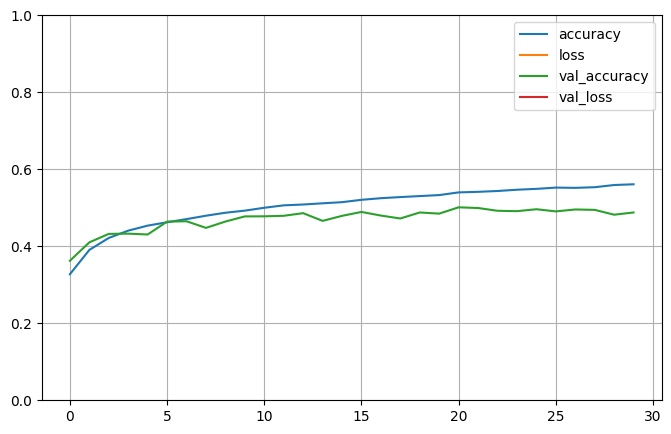

In [2]:
#A multi-layer perceptron described in detail in Ch. 10, pp. 299-307
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))# convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu",kernel_initializer='he_normal'))# a Dense hidden layer with 300 neurons.
model.add(keras.layers.Dense(100, activation="relu",kernel_initializer='he_normal'))# a Dense hidden layer with 100 neurons.
model.add(keras.layers.Dense(10, activation="softmax"))#a Dense output layer with 10 neurons (one per class)

opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)# get prediction probabilities
y_proba.round(2)

In [3]:
y_pred = np.argmax(y_proba, axis=-1) # get predicted class index by finding the index of maximum probability along the last axis
print(np.array(class_names)[y_pred])
y_new = y_test[:3]
print(np.array(class_names)[y_new])
#The predict_classes method was deprecated in TensorFlow 2.6 and has been removed in later versions.
#Instead, you should use model.predict followed by np.argmax to get the predicted class indices.

['dog' 'ship' 'airplane']
[['cat']
 ['ship']
 ['ship']]


/Users/caroldong/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2683 - loss: 2.0171 - val_accuracy: 0.3362 - val_loss: 1.8205
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3767 - loss: 1.7288 - val_accuracy: 0.4134 - val_loss: 1.6483
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4061 - loss: 1.6546 - val_accuracy: 0.4224 - val_loss: 1.5968
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4319 - loss: 1.5892 - val_accuracy: 0.4244 - val_loss: 1.5838
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4451 - loss: 1.5443 - val_accuracy: 0.4414 - val_loss: 1.5684
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4625 - loss: 1.5053 - val_accuracy: 0.4550 - val_loss: 1.5228
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4745 - loss: 1.4719 - val_accuracy: 0.4616 - val_loss: 1.5123
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4800 - loss: 1

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

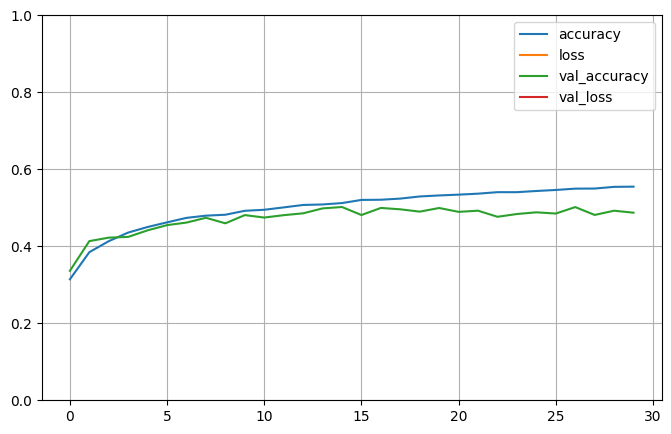

In [4]:
#A multi-layer perceptron described in detail in Ch. 10, pp. 299-307
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))# convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu",kernel_initializer='glorot_normal'))# a Dense hidden layer with 300 neurons.
model.add(keras.layers.Dense(100, activation="relu",kernel_initializer='glorot_normal'))# a Dense hidden layer with 100 neurons.
model.add(keras.layers.Dense(10, activation="softmax"))#a Dense output layer with 10 neurons (one per class)

opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)# get prediction probabilities
y_proba.round(2)

In [5]:
y_pred = np.argmax(y_proba, axis=-1) # get predicted class index by finding the index of maximum probability along the last axis
print(np.array(class_names)[y_pred])
y_new = y_test[:3]
print(np.array(class_names)[y_new])
#The predict_classes method was deprecated in TensorFlow 2.6 and has been removed in later versions.
#Instead, you should use model.predict followed by np.argmax to get the predicted class indices.

['dog' 'airplane' 'airplane']
[['cat']
 ['ship']
 ['ship']]


/Users/caroldong/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.2737 - loss: 2.0273 - val_accuracy: 0.3842 - val_loss: 1.7148
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3749 - loss: 1.7342 - val_accuracy: 0.4004 - val_loss: 1.6678
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4148 - loss: 1.6374 - val_accuracy: 0.4110 - val_loss: 1.6430
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4351 - loss: 1.5826 - val_accuracy: 0.4228 - val_loss: 1.5974
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4481 - loss: 1.5424 - val_accuracy: 0.4380 - val_loss: 1.5657
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4567 - loss: 1.5062 - val_accuracy: 0.4548 - val_loss: 1.5073
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4720 - loss: 1.4724 - val_accuracy: 0.4394 - val_loss: 1.5640
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4790 -

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

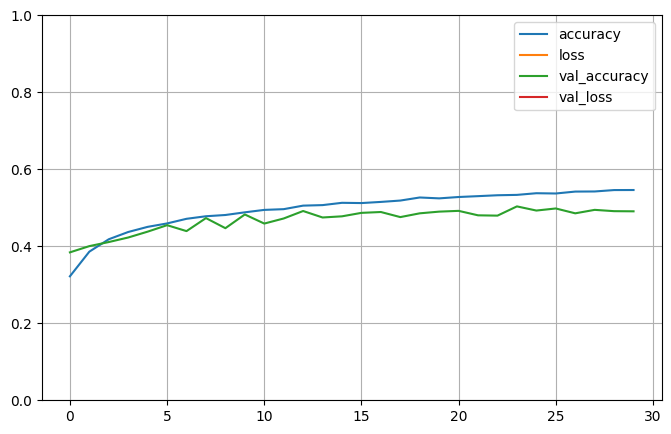

In [6]:
#A multi-layer perceptron described in detail in Ch. 10, pp. 299-307
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))# convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu",kernel_initializer='he_uniform'))# a Dense hidden layer with 300 neurons.
model.add(keras.layers.Dense(100, activation="relu",kernel_initializer='he_uniform'))# a Dense hidden layer with 100 neurons.
model.add(keras.layers.Dense(10, activation="softmax"))#a Dense output layer with 10 neurons (one per class)

opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)# get prediction probabilities
y_proba.round(2)

In [7]:
y_pred = np.argmax(y_proba, axis=-1) # get predicted class index by finding the index of maximum probability along the last axis
print(np.array(class_names)[y_pred])
y_new = y_test[:3]
print(np.array(class_names)[y_new])
#The predict_classes method was deprecated in TensorFlow 2.6 and has been removed in later versions.
#Instead, you should use model.predict followed by np.argmax to get the predicted class indices.

['dog' 'ship' 'ship']
[['cat']
 ['ship']
 ['ship']]


['ship']


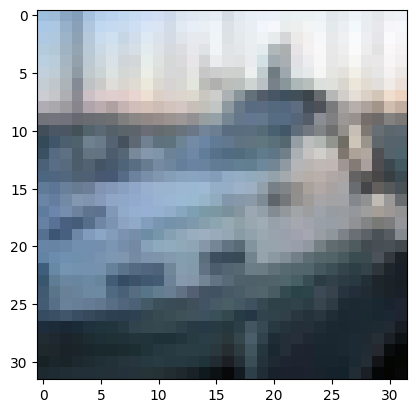

In [11]:
plt.imshow(X_test[2])
print((np.array(class_names)[y_test[2]]))